In [0]:
!pip install pytesseract
!pip install opencv-python
!sudo apt install tesseract-ocr

  Created wheel for pytesseract: filename=pytesseract-0.3.0-py2.py3-none-any.whl size=20970 sha256=07bd834bbe9ca75b78f742db287393df61ba190f1a4a7fdf8109bd6da53a3486
  Stored in directory: /root/.cache/pip/wheels/78/c9/ac/4cb76bd547f9970070522439e5203ba7926c5c5c4f131583ea
Successfully built pytesseract
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 8 not upgraded.
Need to get 4,795 kB of archives.
After this operation, 15.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-eng all 4.00~git24-0e00fe6-1.2 [1,588 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-osd all 4.00~git24-0e00fe6-1.2 [2,989 kB]
Get:3 http://

In [1]:
# from google.colab.patches import cv2_imshow
from matplotlib import pyplot as plt
from PIL import Image
import pytesseract
import argparse
import cv2
import os
import numpy as np
import math
from shutil import copy
import imutils

In [0]:
from google.colab import drive
drive.mount('/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /drive


In [0]:
%cd "/drive/My Drive/Colab Notebooks/FE-Credit-DTNhan"

/drive/My Drive/Colab Notebooks/FE-Credit-DTNhan


In [0]:

src = 'vie.traineddata'
dst = '/usr/share/tesseract-ocr/4.00/tessdata'
copy(src, dst)

'/usr/share/tesseract-ocr/4.00/tessdata/vie.traineddata'

In [0]:
img = cv2.imread('image/NDMT_CCCD.jpg')
ratio = img.shape[0] / 500.0
orig = img.copy()
img_scale = imutils.resize(img, height = 500)
#cv2_imshow(img_scale)

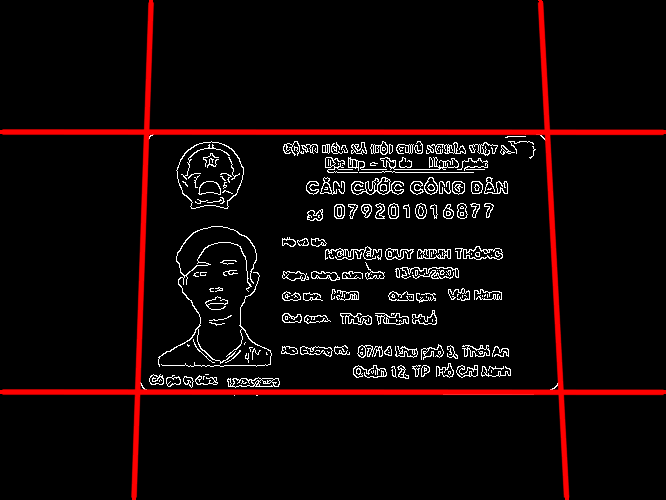

In [0]:


gray = cv2.cv2.cvtColor(img_scale, cv2.COLOR_BGR2GRAY)
gray = cv2.GaussianBlur(img_scale, (3, 3), 3)


dst = cv2.Canny(gray, 50, 100, None, 3)

# Copy edges to the images that will display the results in BGR
cdst = cv2.cvtColor(dst, cv2.COLOR_GRAY2BGR)
    
lines = cv2.HoughLines(dst, 1, np.pi / 180, 140, None, 0, 0)

if lines is not None:
  for i in range(0, len(lines)):
    rho = lines[i][0][0]
    theta = lines[i][0][1]
    a = math.cos(theta)
    b = math.sin(theta)
    x0 = a * rho
    y0 = b * rho
    pt1 = (int(x0 + 1000*(-b)), int(y0 + 1000*(a)))
    pt2 = (int(x0 - 1000*(-b)), int(y0 - 1000*(a)))
    pt1_ls = list(pt1)
    pt2_ls = list(pt2)

    cv2.line(cdst, pt1, pt2, (0,0,255), 3, cv2.LINE_AA)
    
    
#cv2_imshow(out)
cv2_imshow(cdst)

In [0]:
pts = []
for i in range(lines.shape[0]):
  (rho1, theta1) = lines[i,0]
  m1 = -1/np.tan(theta1)
  c1 = rho1 / np.sin(theta1)
  for j in range(i+1,lines.shape[0]):
    (rho2, theta2) = lines[j,0]
    m2 = -1 / np.tan(theta2)
    c2 = rho2 / np.sin(theta2)
    if np.abs(m1 - m2) <= 1e-8:
      continue
    x = (c2 - c1) / (m1 - m2)
    y = m1*x + c1
    if 0 <= x < cdst.shape[1] and 0 <= y < cdst.shape[0]:
      pts.append((int(x), int(y)))

In [0]:
pts_corner = []
sorted_pts_x_axis = sorted(pts, key=lambda tup: tup[0])
sorted_pts_y_axis = sorted(pts, key=lambda tup: tup[1])

x_thres = (sorted_pts_x_axis[0][0] + sorted_pts_x_axis[-1][0]) / 2
y_thres = (sorted_pts_y_axis[0][1] + sorted_pts_y_axis[-1][1]) / 2

right = []
left = []

for i in range(len(pts)):
  if pts[i][0] <= x_thres:
    right.append(pts[i])
  else:
    left.append(pts[i]) 

In [0]:
centre_pt = (x_thres, y_thres)

def distance(pt1, pt2):
  pt1_ls = list(pt1)
  pt2_ls = list(pt2)

  return math.sqrt( (pt1[0]-pt2[0])**2 + (pt1[1]-pt2[1])**2 )

In [0]:
right_up = []
right_down = []
for i in range(len(right)):
  if right[i][1] <= y_thres:
    right_up.append(right[i])
  else:
    right_down.append(right[i]) 

thresh = -1
for i in range(len(right_up)):
  dist = distance(right_up[i], centre_pt)
  if dist > thresh:
    thresh = dist
    right_up_corner = right_up[i]
pts_corner.append(right_up_corner)

thresh = -1
for i in range(len(right_down)):
  dist = distance(right_down[i], centre_pt)
  if dist > thresh:
    thresh = dist
    right_down_corner = right_down[i]
pts_corner.append(right_down_corner)

In [0]:
left_up = []
left_down = []
for i in range(len(left)):
  if left[i][1] <= y_thres:
    left_up.append(left[i])
  else:
    left_down.append(left[i])

thresh = -1
for i in range(len(left_down)):
  dist = distance(left_down[i], centre_pt)
  if dist > thresh:
    thresh = dist
    left_down_corner = left_down[i]
pts_corner.append(left_down_corner)

thresh = -1
for i in range(len(left_up)):
  dist = distance(left_up[i], centre_pt)
  if dist > thresh:
    thresh = dist
    left_up_corner = left_up[i]
pts_corner.append(left_up_corner)

In [0]:
pts_np = np.array(pts_corner)
pts_use = pts_np[:,None] # We need to convert to a 3D numpy array with a singleton 2nd dimension
hull = cv2.convexHull(pts_use)

print(hull)

[[[561 392]]

 [[137 392]]

 [[146 132]]

 [[547 132]]]


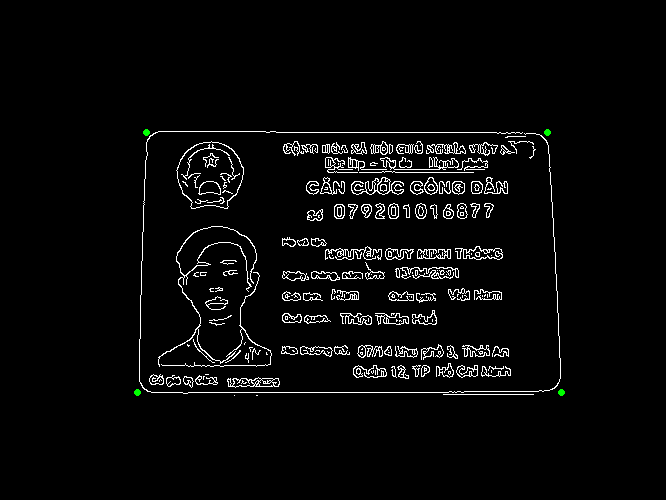

In [0]:
out2 = np.dstack([dst, dst, dst])
for pt in hull[:,0]:
    cv2.circle(out2, tuple(pt), 2, (0, 255, 0), 2)

cv2_imshow(out2)

In [0]:
def order_points(pts):
  # initialzie a list of coordinates that will be ordered
  # such that the first entry in the list is the top-left,
  # the second entry is the top-right, the third is the
  # bottom-right, and the fourth is the bottom-left
  rect = np.zeros((4, 2), dtype = "float32")
  
  # the top-left point will have the smallest sum, whereas
  # the bottom-right point will have the largest sum
  s = pts.sum(axis = 1)
  rect[0] = pts[np.argmin(s)]
  rect[2] = pts[np.argmax(s)]
  
  # now, compute the difference between the points, the
  # top-right point will have the smallest difference,
  # whereas the bottom-left will have the largest difference
  diff = np.diff(pts, axis = 1)
  rect[1] = pts[np.argmin(diff)]
  rect[3] = pts[np.argmax(diff)]
  
  # return the ordered coordinates
  return rect

In [0]:
def four_point_transform(image, pts):
  # obtain a consistent order of the points and unpack them
	# individually
  rect = order_points(pts)
  (tl, tr, br, bl) = rect
  
  # compute the width of the new image, which will be the
  # maximum distance between bottom-right and bottom-left
  # x-coordiates or the top-right and top-left x-coordinates
  widthA = np.sqrt(((br[0] - bl[0]) ** 2) + ((br[1] - bl[1]) ** 2))
  widthB = np.sqrt(((tr[0] - tl[0]) ** 2) + ((tr[1] - tl[1]) ** 2))
  maxWidth = max(int(widthA), int(widthB))
  
  # compute the height of the new image, which will be the
  # maximum distance between the top-right and bottom-right
  # y-coordinates or the top-left and bottom-left y-coordinates
  heightA = np.sqrt(((tr[0] - br[0]) ** 2) + ((tr[1] - br[1]) ** 2))
  heightB = np.sqrt(((tl[0] - bl[0]) ** 2) + ((tl[1] - bl[1]) ** 2))
  maxHeight = max(int(heightA), int(heightB))
  
  # now that we have the dimensions of the new image, construct
  # the set of destination points to obtain a "birds eye view",
  # (i.e. top-down view) of the image, again specifying points
  # in the top-left, top-right, bottom-right, and bottom-left
  # order
  dst = np.array([
                  [0, 0],
                  [maxWidth - 1, 0],
                  [maxWidth - 1, maxHeight - 1],
                  [0, maxHeight - 1]], dtype = "float32")
  
  # compute the perspective transform matrix and then apply it
  M = cv2.getPerspectiveTransform(rect, dst)
  warped = cv2.warpPerspective(image, M, (maxWidth, maxHeight))
  
  # return the warped image
  return warped

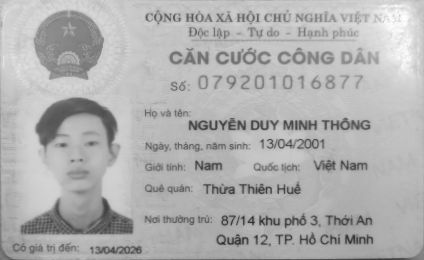

In [0]:
corner_arr = np.asarray(pts_corner, dtype = "float32")
warped = four_point_transform(img_scale, corner_arr)
warped = cv2.cvtColor(warped, cv2.COLOR_BGR2GRAY)
cv2_imshow(warped)

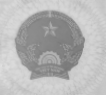

In [0]:
bin_img = warped

ratio_y = 3.1/8.4
ratio_x1 = 0.25/5.4
ratio_x2 = 1.6/5.4


national_symbol = bin_img[:int(bin_img.shape[0]*ratio_y),
                          int(bin_img.shape[1]*ratio_x1):int(bin_img.shape[1]*ratio_x2)
                          ]

cv2_imshow(national_symbol)

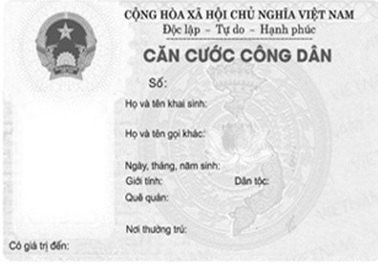

(264, 378)


In [0]:
format_standard = cv2.imread('image/standard_format_CCCd.jpg', cv2.IMREAD_GRAYSCALE)
cv2_imshow(format_standard)
print(format_standard.shape)

In [0]:
from matplotlib import pyplot as plt

w, h = national_symbol.shape[::-1]

res = cv2.matchTemplate(format_standard,national_symbol,cv2.TM_CCOEFF_NORMED)
print(len(res))
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
top_left = max_loc
bottom_right = (top_left[0] + w, top_left[1] + h)
cv2.rectangle(format_standard,top_left, bottom_right, (125,125,125), 2)
cv2.imwrite('image/res.jpg',format_standard)

170


True

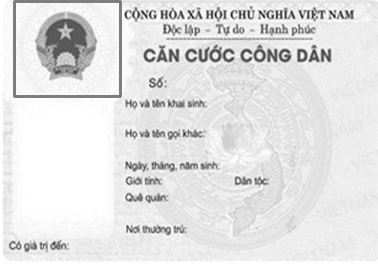

In [0]:
test = cv2.imread('image/res.jpg')
cv2_imshow(test)